In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
import plotly.graph_objects as go
import plotly.express as px
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import SequentialFeatureSelector,RFE
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_squared_log_error
import time
import category_encoders as ce
from xgboost.sklearn import XGBRegressor

In [2]:
car_data = pd.read_csv('data/vehicles.csv')
print(car_data.shape)
car_data.head()

(426880, 18)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
car_data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [5]:
car_data.dtypes

id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [6]:
car_data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [7]:
car_data['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [8]:
car_data['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [9]:
car_data['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [10]:
car_data['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [11]:
### Drop Un-Necessary Columns 
car_data.drop(['id','region','VIN','state', 'size'], axis=1, inplace=True)
print(car_data.shape)

(426880, 13)


In [12]:
car_data.isnull().sum()

price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
dtype: int64

In [13]:
car_data['price'].value_counts().sort_values(ascending=True)

price
17873        1
26873        1
15375        1
27109        1
17868        1
         ...  
8995      2837
9995      2867
7995      3129
6995      3169
0        32895
Name: count, Length: 15655, dtype: int64

In [14]:
#Remove the data with price = 0
car_data = car_data[car_data['price'] > 0]

car_data = car_data[car_data['price'] > 0]
car_data = car_data[car_data['price'] < 500_000]

print(car_data.shape)

(393917, 13)


In [15]:
car_data.isnull().sum()

price                0
year              1173
manufacturer     16174
model             4678
condition       151349
cylinders       160370
fuel              2594
odometer          2290
title_status      7734
transmission      1823
drive           120212
type             85888
paint_color     117104
dtype: int64

In [16]:
car_data.dropna(subset=['year'], inplace=True)

<Axes: >

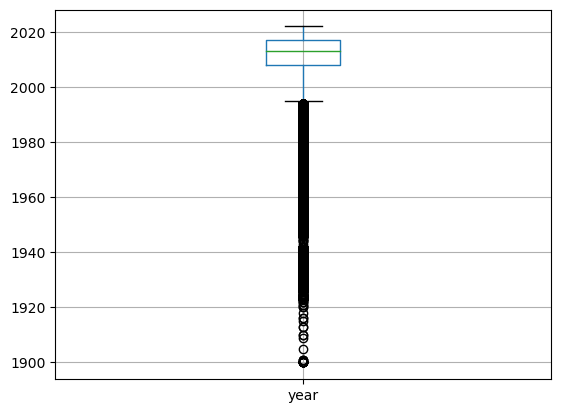

In [17]:
car_data.boxplot('year')

In [18]:
## In general people will not be interested to buy a car too old unless they are Classic Cars, 
## hence remove cars older than 1995, considering cars 20 years older 

car_data = car_data[car_data['year'] > 1995]
print(car_data.shape)

(375940, 13)


In [19]:
car_data.isnull().sum()

price                0
year                 0
manufacturer     12405
model             3392
condition       145553
cylinders       155199
fuel              2313
odometer          2202
title_status      7373
transmission      1745
drive           114042
type             79001
paint_color     110965
dtype: int64

In [20]:
# Drop the NaNs from manufacturer
car_data.dropna(subset=['manufacturer'], inplace=True)

In [21]:
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model             3392
condition       141657
cylinders       149189
fuel              2150
odometer          2157
title_status      7220
transmission      1692
drive           108985
type             74634
paint_color     106978
dtype: int64

In [22]:
# Drop the NaNs from model
car_data.dropna(subset=['model'], inplace=True)

In [23]:
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition       139692
cylinders       147410
fuel              2150
odometer          2154
title_status      7189
transmission      1676
drive           107607
type             73174
paint_color     105076
dtype: int64

In [24]:
### condition has too many Null values but it's an important feature in buying perspective, 
### hence need to derive info for missing values
car_data['condition'].unique()
### In general condition is attributed to Milage hence let's derive the condition based on the odometer feature.

array(['good', 'excellent', 'fair', 'like new', 'new', nan, 'salvage'],
      dtype=object)

In [25]:
print('good : ',car_data[car_data['condition']=='good']['odometer'].mean())
print('excellent : ',car_data[car_data['condition']=='excellent']['odometer'].mean())
print('fair : ',car_data[car_data['condition']=='fair']['odometer'].mean())
print('new : ',car_data[car_data['condition']=='new']['odometer'].mean())
print('like new :',car_data[car_data['condition']=='like new']['odometer'].mean())
print('new :',car_data[car_data['condition']=='new']['odometer'].mean())
print('salvage :',car_data[car_data['condition']=='salvage']['odometer'].mean())

good :  77747.59469808271
excellent :  107646.00965750233
fair :  193803.924259056
new :  48282.418703506904
like new : 83136.73290540173
new : 48282.418703506904
salvage : 172984.6628959276


In [26]:
avg_good = car_data[car_data['condition']=='good']['odometer'].mean()
avg_excellent = car_data[car_data['condition']=='excellent']['odometer'].mean()
avg_fair = car_data[car_data['condition']=='fair']['odometer'].mean()
avg_new = car_data[car_data['condition']=='new']['odometer'].mean()
avg_like_new = car_data[car_data['condition']=='like new']['odometer'].mean()
avg_new = car_data[car_data['condition']=='new']['odometer'].mean()
avg_salvage = car_data[car_data['condition']=='salvage']['odometer'].mean()

In [27]:
### Looking at the above data we found that the average odometer reading is not perfectly attributed to the condition of the car,
### hence let's use machine learning techniques to predict the missing 'condition' 
### Before proceeding with ML tecnique first let's handle Odomoter NULL values
car_data.dropna(subset=['odometer'], inplace=True)
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition       138924
cylinders       146299
fuel              1948
odometer             0
title_status      6988
transmission      1450
drive           107192
type             72784
paint_color     104123
dtype: int64

In [28]:
car_data['odometer'].min()

0.0

In [29]:
car_data['odometer'].max()

10000000.0

In [30]:
car_data[car_data['odometer']== 0.0]['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'new', 'like new', 'salvage'],
      dtype=object)

In [31]:
car_data[car_data['odometer']== 10000000.0]['condition']

105059     NaN
106192     NaN
106542     NaN
108102     NaN
108797     NaN
109793     NaN
109840     NaN
110253     NaN
110623     NaN
110715     NaN
110964     NaN
144436    good
340694     NaN
Name: condition, dtype: object

In [32]:
### from the above we can see that there are many NaN 'condition' records haveing odometer more than 1Million miles,
### hence let's consider only data with odomter less than 1Million miles
car_data = car_data[car_data['odometer'] < 1_000_000]

In [33]:
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition       138857
cylinders       146206
fuel              1948
odometer             0
title_status      6988
transmission      1450
drive           107082
type             72688
paint_color     104040
dtype: int64

In [34]:
# # Split data into two parts: one with missing 'condition' values and one without
# data_with_condition = car_data.dropna(subset=['condition'])
# data_without_condition = car_data[car_data['condition'].isna()]

# # Select relevant features and target
# features = ['price', 'year', 'manufacturer', 'model', 'odometer']
# target = 'condition'

# X_train = data_with_condition[features]
# y_train = data_with_condition[target]
# X_test = data_without_condition[features]

# X_train = pd.get_dummies(X_train)
# X_test = pd.get_dummies(X_test)

# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# predicted_conditions = model.predict(X_test)

# data_without_condition['condition'] = predicted_conditions

# # Concatenate data back together
# filled_data = pd.concat([data_with_condition, data_without_condition])



In [35]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import silhouette_score

# # Select features for clustering and imputation
# features = ['price', 'year', 'manufacturer', 'model', 'odometer']

# # Handle categorical variables
# X = pd.get_dummies(car_data[features])

# # Determine the optimal number of clusters using the elbow method
# wcss = []
# silhouette_scores = []
# for k in range(2, 3):  # Trying different numbers of clusters
#     kmeans = KMeans(n_clusters=k)
#     kmeans.fit(X)
#     wcss.append(kmeans.inertia_)  # within-cluster sum of squares
#     silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# # Plot the elbow curve
# plt.figure(figsize=(10, 5))
# plt.plot(range(2, 3), wcss, marker='o', linestyle='-', color='b')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.title('Elbow Method for Optimal Number of Clusters')
# plt.xticks(range(2, 11))
# plt.grid(True)
# plt.show()

# # Find the best number of clusters based on the elbow point in the WCSS plot
# best_num_clusters = wcss.index(min(wcss)) + 2  # Adding 2 because we started from 2 clusters
# print("Best number of clusters:", best_num_clusters)

# # Perform K-means clustering with the best number of clusters
# kmeans = KMeans(n_clusters=best_num_clusters)
# car_data['cluster'] = kmeans.fit_predict(X)

# # Impute missing 'condition' values within each cluster
# for cluster_id in car_data['cluster'].unique():
#     cluster_data = car_data[car_data['cluster'] == cluster_id]
#     imputer = SimpleImputer(strategy='most_frequent')
#     cluster_data['condition'] = imputer.fit_transform(cluster_data[['condition']])
#     car_data.loc[car_data['cluster'] == cluster_id, 'condition'] = cluster_data['condition']

# # # Drop the 'cluster' column
# # car_data.drop('cluster', axis=1, inplace=True)

# # # Optionally, save the imputed data to a new CSV file
# # car_data.to_csv('imputed_used_cars_data.csv', index=False)

In [36]:
car_data['condition'].value_counts()

condition
good         108833
excellent     85807
like new      18373
fair           4532
new             939
salvage         437
Name: count, dtype: int64

In [37]:
# good :  75545.47849536463
# excellent :  106990.14450867052
# fair :  179884.3356119074
# new :  46015.71458998935
# like new : 82245.37887691805
# new : 46015.71458998935
# salvage : 150184.81006864988

#new
car_data.loc[car_data.odometer < 47000, 'condition'] = car_data.loc[car_data.odometer < 47000, 'condition'].fillna('new')
#like new
car_data.loc[((car_data.odometer > 47000) & (car_data.odometer < 76000)), 'condition'] = \
car_data.loc[((car_data.odometer > 47000) & (car_data.odometer < 76000)), 'condition'].fillna('like new')
#excellent
car_data.loc[((car_data.odometer > 76000) & (car_data.odometer < 83000)), 'condition'] = \
car_data.loc[((car_data.odometer > 76000) & (car_data.odometer < 83000)), 'condition'].fillna('excellent')
#good
car_data.loc[((car_data.odometer > 83000) & (car_data.odometer < 107000)), 'condition'] = \
car_data.loc[((car_data.odometer > 83000) & (car_data.odometer < 107000)), 'condition'].fillna('good')
#fair
car_data.loc[((car_data.odometer > 107000) & (car_data.odometer < 150000)), 'condition'] = \
car_data.loc[((car_data.odometer > 107000) & (car_data.odometer < 150000)), 'condition'].fillna('fair')
#salvage
car_data.loc[(car_data.odometer > 150000), 'condition'] = \
car_data.loc[(car_data.odometer > 150000), 'condition'].fillna('salvage')

car_data['condition'].value_counts()

condition
good         129894
excellent     91503
like new      40148
new           35521
fair          34559
salvage       25486
Name: count, dtype: int64

In [38]:
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition          667
cylinders       146206
fuel              1948
odometer             0
title_status      6988
transmission      1450
drive           107082
type             72688
paint_color     104040
dtype: int64

In [39]:
car_data.dropna(subset=['condition'], inplace=True)
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders       145663
fuel              1948
odometer             0
title_status      6988
transmission      1450
drive           106538
type             72135
paint_color     103476
dtype: int64

In [40]:
### Null values in cylinders are huge in number and cannot be dropped, so impute the missing values with the common value
car_data['cylinders'] = car_data['cylinders'].fillna(car_data['cylinders'].mode().iloc[0])

In [41]:
car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel              1948
odometer             0
title_status      6988
transmission      1450
drive           106538
type             72135
paint_color     103476
dtype: int64

In [42]:
### fuel, title_status, transmission missing values are less in number compared to total data, hence can be dropped.

car_data.dropna(subset=['fuel'], inplace=True)
car_data.dropna(subset=['title_status'], inplace=True)
car_data.dropna(subset=['transmission'], inplace=True)

car_data.isnull().sum()

price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
drive           102161
type             71614
paint_color      96830
dtype: int64

In [43]:
### drive - apply the corelation imputation to fill the missing values
car_data['drive'].value_counts()


drive
4wd    110681
fwd     90938
rwd     43447
Name: count, dtype: int64

In [44]:
car_data.groupby('drive')['type'].value_counts()

drive  type       
4wd    SUV            37780
       pickup         23632
       truck          19559
       sedan           6715
       wagon           3919
       other           3092
       hatchback        915
       coupe            595
       offroad          344
       convertible      337
       van              227
       mini-van         147
       bus                7
fwd    sedan          41791
       SUV            12987
       hatchback       8919
       wagon           3652
       mini-van        3400
       coupe           3204
       van             2990
       other           2942
       pickup          1440
       convertible      993
       truck            301
       bus               29
       offroad            8
rwd    sedan          10487
       coupe           7622
       truck           5263
       pickup          3580
       convertible     3230
       SUV             3036
       van             2593
       other           2581
       hatchback        365
 

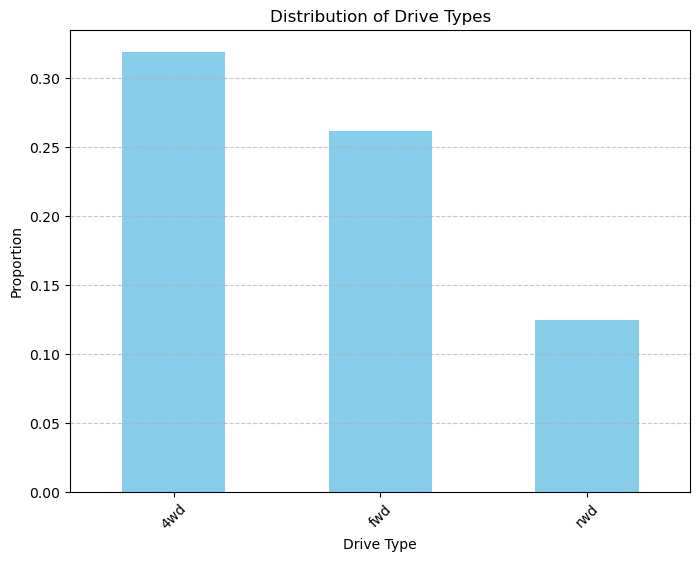

In [45]:
drive_counts = car_data['drive'].value_counts()

total_count = len(car_data)
drive_proportions = drive_counts / total_count


plt.figure(figsize=(8, 6))
drive_proportions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Drive Types')
plt.xlabel('Drive Type')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [46]:
car_data['drive'] = car_data['drive'].fillna(method='ffill')
car_data.isnull().sum()


price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               4
type            71614
paint_color     96830
dtype: int64

In [47]:
car_data.dropna(subset=['drive'], inplace=True)
car_data.isnull().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type            71614
paint_color     96830
dtype: int64

In [48]:
### type is unique and cannot be determined by any other features hence fill it with 'other'
car_data['type'].unique()

array(['truck', 'pickup', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'convertible', nan, 'wagon', 'van',
       'bus'], dtype=object)

In [49]:
car_data['type'] = car_data['type'].fillna('other')
car_data.isnull().sum()

price               0
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer            0
title_status        0
transmission        0
drive               0
type                0
paint_color     96830
dtype: int64

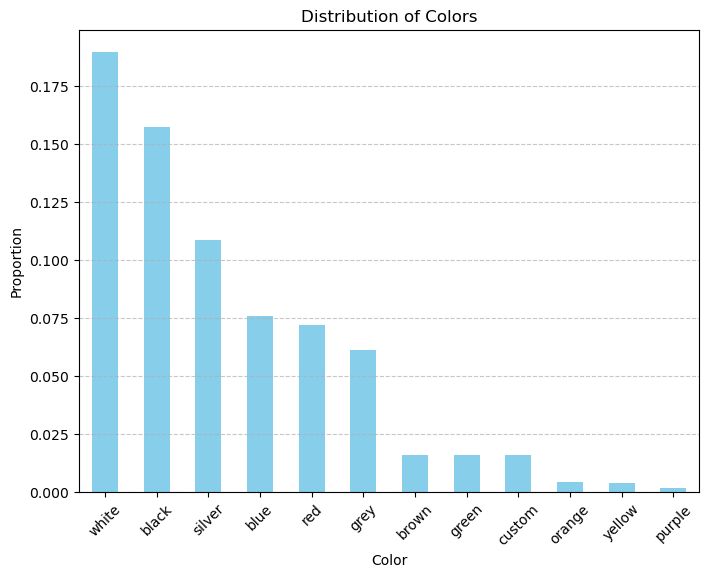

In [50]:
color_counts = car_data['paint_color'].value_counts()

total_count = len(car_data)
drive_proportions = color_counts / total_count


plt.figure(figsize=(8, 6))
drive_proportions.plot(kind='bar', color='skyblue')
plt.title('Distribution of Colors')
plt.xlabel('Color')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [51]:
### let's use forward fill for paint_color
car_data['paint_color'] = car_data['paint_color'].fillna(method='ffill')
car_data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

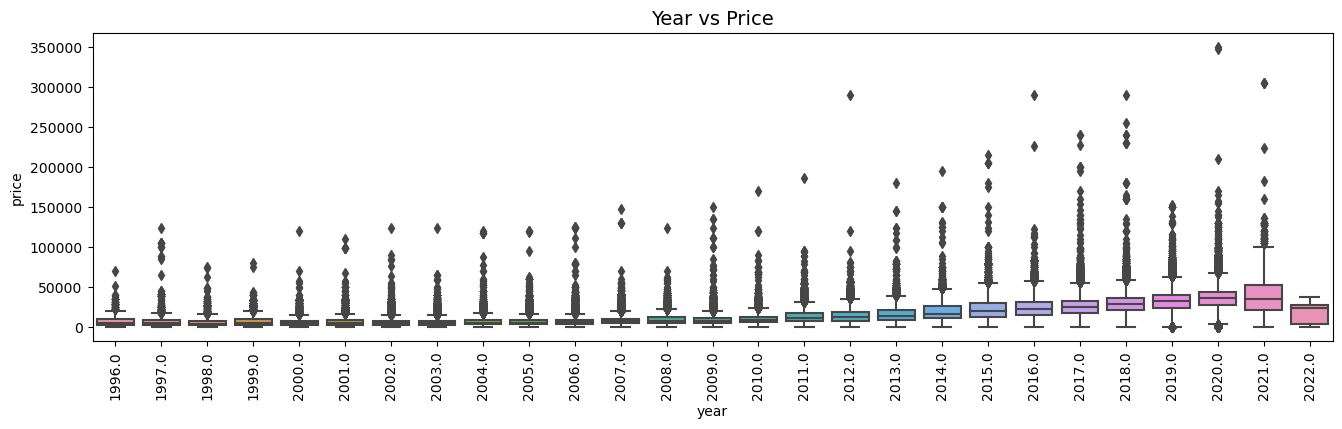

In [72]:
plt.figure(figsize=(16,4))
plt.title('Year vs Price', fontsize=14)
sns.boxplot(x='year', y='price', data=car_data)
plt.xticks(rotation=90)
plt.show()

In [53]:
numerical_data = ['int64','float64']
num_data = car_data.select_dtypes(include=numerical_data)
num_data

,price,year,odometer
31,15000,2013.0,128000.0
32,27990,2012.0,68696.0
33,34590,2016.0,29499.0
34,35000,2019.0,43000.0
35,29990,2016.0,17302.0
...,...,...,...
426875,23590,2019.0,32226.0
426876,30590,2020.0,12029.0
426877,34990,2020.0,4174.0
426878,28990,2018.0,30112.0


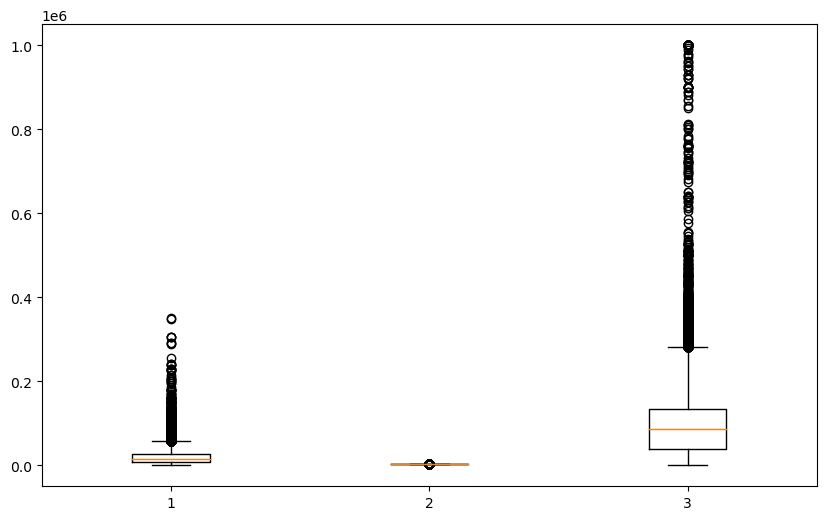

In [54]:
### Outliers in the 3 numerical features
# Numeric features without any scaling
plt.figure(figsize=(10,6))
plt.boxplot(num_data)
plt.show()

In [55]:
# numeric_columns = car_data.select_dtypes(include=['int64', 'float64'])
# Q1 = numeric_columns.quantile(0.25)
# Q3 = numeric_columns.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [56]:
# cars = car_data[~((car_data<(Q1-1.5*IQR)) | (car_data>(Q3+1.5*IQR))).any(axis=1)]
# cars.head()

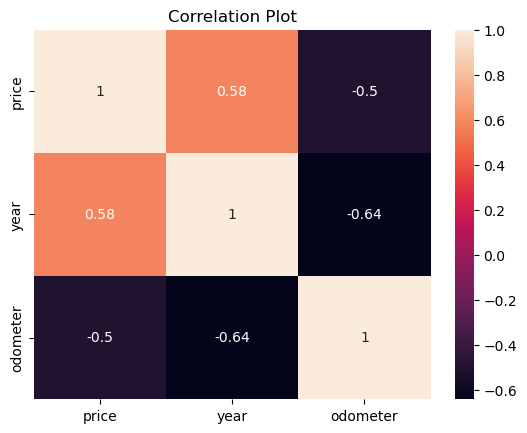

In [74]:
plt.title('Correlation Plot')
sns.heatmap(num_data.corr(), annot=True)
plt.show()

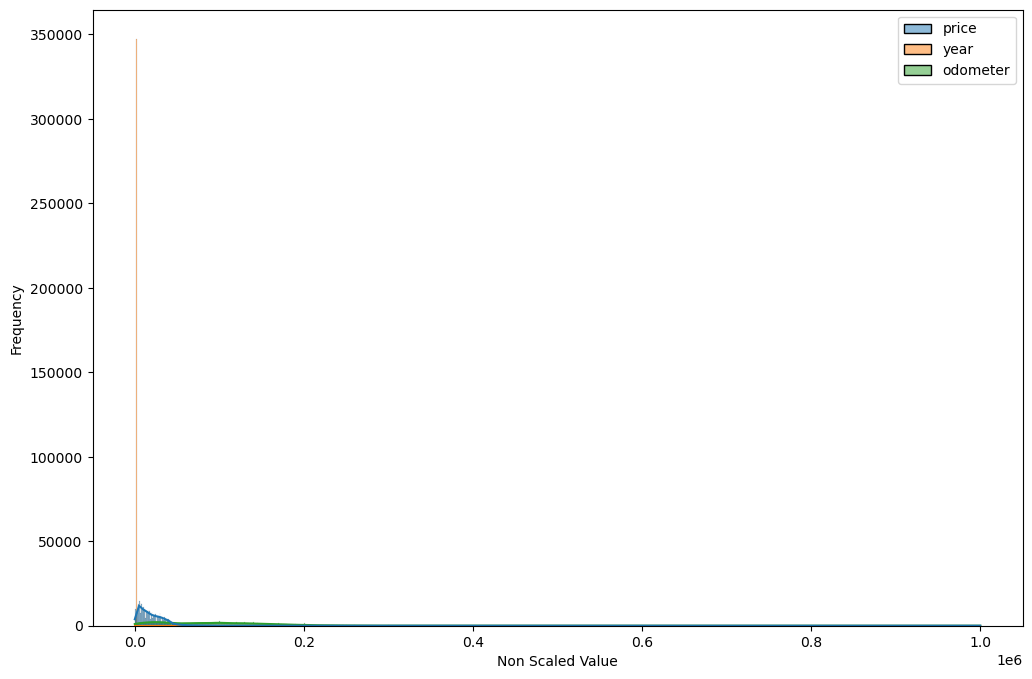

In [58]:
### Non scaled Numerical features
plt.figure(figsize=(12, 8))
#plt.title('Numerical Features KDE', fontsize=14)
sns.histplot(data=num_data, kde=True)
plt.xlabel('Non Scaled Value')
plt.ylabel('Frequency')
plt.show()

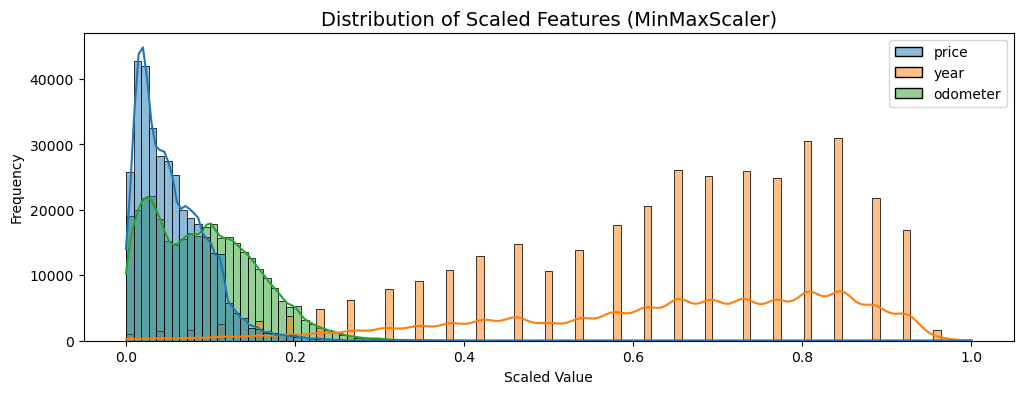

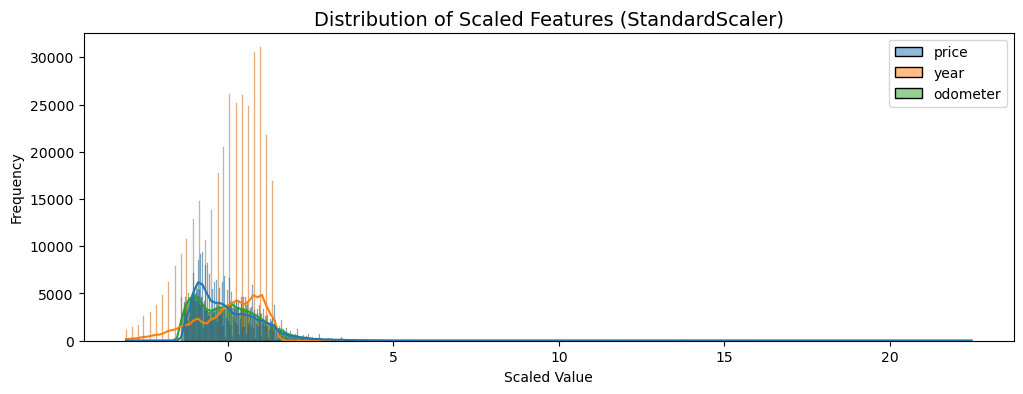

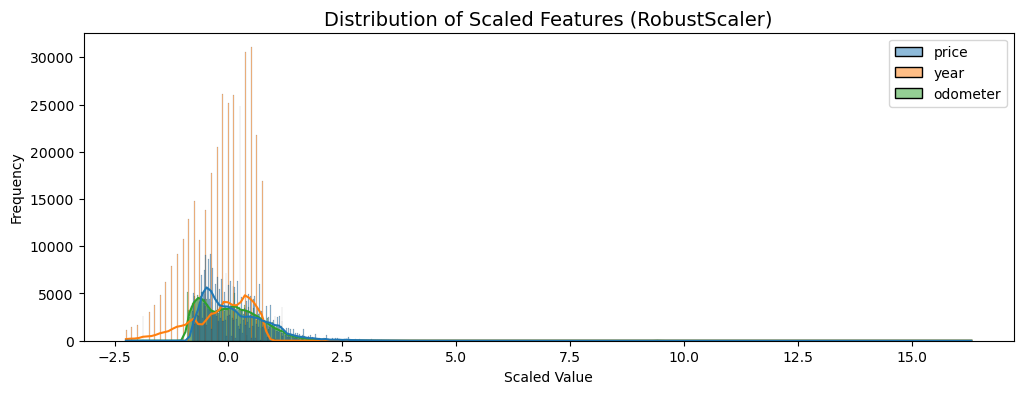

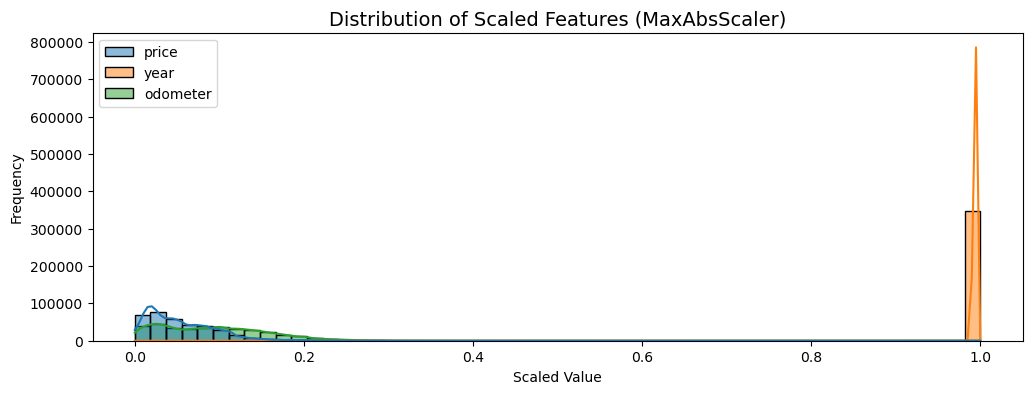

In [75]:
### From the above graph looks like we need scaling, let's find out the best scaler suitable for this data

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

# Assume X contains your numerical features

# Define a list of scalers to compare
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MaxAbsScaler': MaxAbsScaler()
}

# Plot histograms of scaled features for each scaler
for scaler_name, scaler in scalers.items():
    # Fit and transform the scaler
    X_scaled = scaler.fit_transform(num_data)
    
    # Convert the scaled data to a DataFrame for easier plotting
    X_scaled_df = pd.DataFrame(X_scaled, columns=num_data.columns)
    
    # Plot histograms of scaled features
    plt.figure(figsize=(12, 4))
    plt.title(f'Distribution of Scaled Features ({scaler_name})', fontsize=14)
    sns.histplot(data=X_scaled_df, kde=True)
    plt.xlabel('Scaled Value')
    plt.ylabel('Frequency')
    plt.show()

In [60]:
# ### Looks like Robust scaler is the effective scaler to choose from the options.
# y = car_data['price']
# X = num_data

In [61]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error

# # Assume X contains your numerical features and y contains the target variable

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define a list of scalers to compare
# scalers = {
#     'MinMaxScaler': MinMaxScaler(),
#     'StandardScaler': StandardScaler(),
#     'RobustScaler': RobustScaler(),
#     'MaxAbsScaler': MaxAbsScaler()
# }

# # Train a model with each scaler and evaluate performance
# for scaler_name, scaler in scalers.items():
#     # Fit and transform the scaler on the training data
#     X_train_scaled = scaler.fit_transform(X_train)
    
#     # Transform the testing data
#     X_test_scaled = scaler.transform(X_test)
    
#     # Train a simple linear regression model
#     model = LinearRegression()
#     model.fit(X_train_scaled, y_train)

#     # Make predictions on the testing data
#     y_pred = model.predict(X_test_scaled)
    
#     # Calculate mean squared error
#     mse = mean_squared_error(y_test, y_pred)
    
#     print(f'{scaler_name}: Mean Squared Error = {mse}')

In [77]:
car_data.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
31,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black
32,27990,2012.0,gmc,sierra 2500 hd extended cab,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black
33,34590,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver
34,35000,2019.0,toyota,tacoma,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey
35,29990,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red


In [78]:
car_data.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
dtype: int64

## Linear Regression

Starting Linear Regression...
Evaluation metrics for Linear Regression:
Root Mean Squared Error Train, Test: 8321.99566128627',' 8421.455509959214
Mean Absolute Error Train, Test: 5272.627859569886',' 5341.837652768362
R-squared Train, Test: 0.5306358798781519',' 0.5124532045441901
        Feature  Coefficient
0          year  7148.047489
2     condition     0.715701
3  title_status     0.434016
5      odometer     0.349296
6          fuel     0.250952
7         drive     0.186237
8     cylinders     0.181633
9         model     0.176996
4  transmission    -0.410535
1  manufacturer -3602.650239


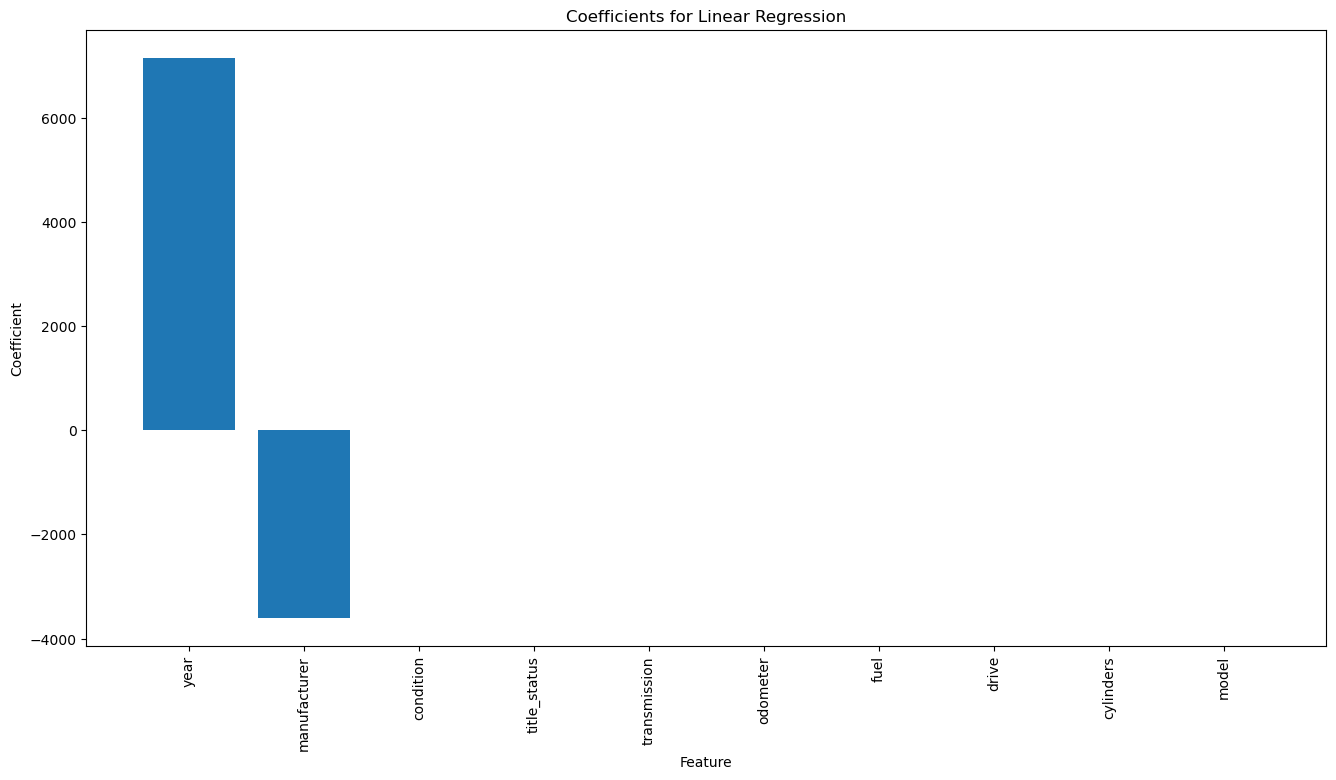

Time taken for Linear Regression: 9.087080955505371 seconds



In [79]:
# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'param_grid': {}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    pipeline.fit(X_train,y_train)
    
    # Predict on the test set
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)
    r2_train = r2_score(y_pred_train, y_train)
    r2_test = r2_score(y_pred_test, y_test)
    
    
    # Print evaluation metrics
    print(f"Evaluation metrics for {model_name}:")
    print(f"Root Mean Squared Error Train, Test: {rmse_train}',' {rmse_test}")
    print(f"Mean Absolute Error Train, Test: {mae_train}',' {mae_test}")
    print(f"R-squared Train, Test: {r2_train}',' {r2_test}")
    
    # Plot coefficients in sorted order
    coef_values = pipeline.named_steps['model'].coef_
    coef_names = X.columns
    sorted_indices = sorted(range(len(coef_values)), key=lambda i: abs(coef_values[i]), reverse=True)
    
    coef_df = pd.DataFrame({
    'Feature': [coef_names[i] for i in sorted_indices],
    'Coefficient': [coef_values[i] for i in sorted_indices]})
    # Display the DataFrame
    print(coef_df.sort_values(by='Coefficient', ascending=False))
    
    plt.figure(figsize=(16, 8))
    plt.bar(range(len(coef_values)), [coef_values[i] for i in sorted_indices])
    plt.xticks(range(len(coef_values)), [coef_names[i] for i in sorted_indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title(f'Coefficients for {model_name}')
    plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")


## Ridge Regression

In [64]:
### Model selection 
### The below code didn't produce any output even after 14hours as the grid search and CV 
### for best params and feature selection never returned the result.

# test_data = car_data[:1000000]
# X = test_data.drop('price', axis=1)
# y = test_data['price']

# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    
    'Ridge Regression': {
        'model': Ridge(),
        'param_grid': {'model__alpha': [0.1, 1, 10]}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    # Perform GridSearchCV with cross-validation
    grid_search = GridSearchCV(pipeline, model_data['param_grid'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    # Print results
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Mean MSE (cross-validated):", -grid_search.best_score_)
    
    # Plotting the graphs
#     plt.figure(figsize=(10, 6))
#     plt.bar(range(len(grid_search.best_estimator_['model'].coef_)), grid_search.best_estimator_['model'].coef_)
#     plt.xticks(range(len(X.columns)), X.columns, rotation=90)
#     plt.xlabel('Feature')
#     plt.ylabel('Coefficient')
#     plt.title(f'Coefficients for {model_name}')
#     plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")

Starting Ridge Regression...
Model: Ridge Regression
Best Parameters: {'model__alpha': 0.1}
Best Mean MSE (cross-validated): 74756384.26540491
Time taken for Ridge Regression: 17.327486038208008 seconds



Starting Ridge Regression...
Evaluation metrics for Ridge Regression:
Root Mean Squared Error Train, Test: 8300.9321536681',' 8401.923949414262
Mean Absolute Error Train, Test: 5247.883280256713',' 5321.116046737568
R-squared Train, Test: 0.5341142429099797',' 0.5162006484746013
         Feature  Coefficient
0           year  7170.783400
2      condition     0.700773
3   title_status     0.436249
5       odometer     0.354670
6           fuel     0.224192
7          drive     0.185856
8      cylinders     0.180676
9          model     0.165451
10          type     0.158006
11   paint_color     0.009666
4   transmission    -0.387607
1   manufacturer -3636.757052


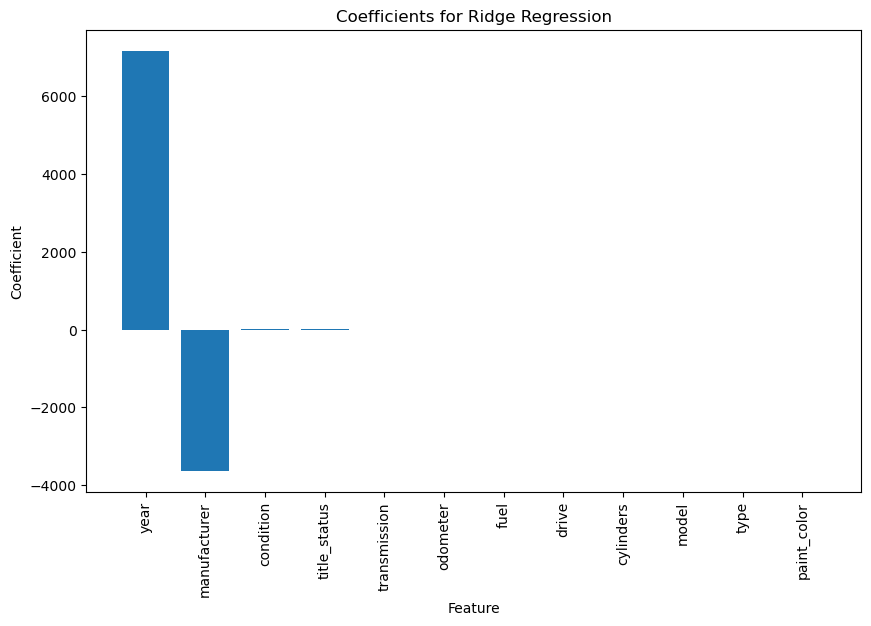

Time taken for Ridge Regression: 1.2244718074798584 seconds



In [65]:
# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    'Ridge Regression': {
        'model': Ridge(alpha=0.1),
        'param_grid': {}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    pipeline.fit(X_train,y_train)
    
    # Predict on the test set
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)
    r2_train = r2_score(y_pred_train, y_train)
    r2_test = r2_score(y_pred_test, y_test)
    
    
    # Print evaluation metrics
    print(f"Evaluation metrics for {model_name}:")
    print(f"Root Mean Squared Error Train, Test: {rmse_train}',' {rmse_test}")
    print(f"Mean Absolute Error Train, Test: {mae_train}',' {mae_test}")
    print(f"R-squared Train, Test: {r2_train}',' {r2_test}")
    
    # Plot coefficients in sorted order
    coef_values = pipeline.named_steps['model'].coef_
    coef_names = X.columns
    sorted_indices = sorted(range(len(coef_values)), key=lambda i: abs(coef_values[i]), reverse=True)
    
    coef_df = pd.DataFrame({
    'Feature': [coef_names[i] for i in sorted_indices],
    'Coefficient': [coef_values[i] for i in sorted_indices]})
    # Display the DataFrame
    print(coef_df.sort_values(by='Coefficient', ascending=False))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coef_values)), [coef_values[i] for i in sorted_indices])
    plt.xticks(range(len(coef_values)), [coef_names[i] for i in sorted_indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title(f'Coefficients for {model_name}')
    plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")


## Lasso

In [66]:
### Model selection 
### The below code didn't produce any output even after 14hours as the grid search and CV 
### for best params and feature selection never returned the result.

# test_data = car_data[:1000000]
# X = test_data.drop('price', axis=1)
# y = test_data['price']

# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    
    'Lasso Regression': {
        'model': Lasso(),
        'param_grid': {'model__alpha': [0.1, 1, 10]}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    # Perform GridSearchCV with cross-validation
    grid_search = GridSearchCV(pipeline, model_data['param_grid'], cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)
    
    # Print results
    print(f"Model: {model_name}")
    print("Best Parameters:", grid_search.best_params_)
    print("Best Mean MSE (cross-validated):", -grid_search.best_score_)
    
#     # Plotting the graphs
#     plt.figure(figsize=(10, 6))
#     plt.bar(range(len(grid_search.best_estimator_['model'].coef_)), grid_search.best_estimator_['model'].coef_)
#     plt.xticks(range(len(X.columns)), X.columns, rotation=90)
#     plt.xlabel('Feature')
#     plt.ylabel('Coefficient')
#     plt.title(f'Coefficients for {model_name}')
#     plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")

Starting Lasso Regression...
Model: Lasso Regression
Best Parameters: {'model__alpha': 0.1}
Best Mean MSE (cross-validated): 74756511.23767771
Time taken for Lasso Regression: 19.779062032699585 seconds



Starting Lasso Regression...
Evaluation metrics for Lasso Regression:
Root Mean Squared Error Train, Test: 8300.932156567838',' 8401.927616294895
Mean Absolute Error Train, Test: 5247.874462551184',' 5321.108627859638
R-squared Train, Test: 0.5341075788320568',' 0.5161931963125608
         Feature  Coefficient
0           year  7170.588724
2      condition     0.700782
3   title_status     0.436245
5       odometer     0.354667
6           fuel     0.224184
7          drive     0.185853
8      cylinders     0.180701
9          model     0.165450
10          type     0.158002
11   paint_color     0.009673
4   transmission    -0.387589
1   manufacturer -3636.478983


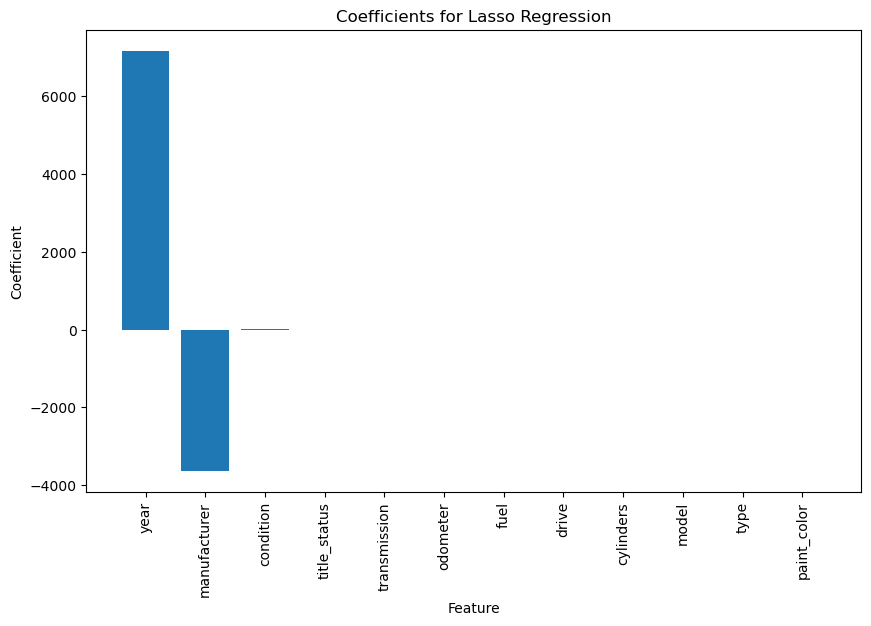

Time taken for Lasso Regression: 1.6360859870910645 seconds



In [67]:
# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    'Lasso Regression': {
        'model': Lasso(alpha=0.1),
        'param_grid': {}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    pipeline.fit(X_train,y_train)
    
    # Predict on the test set
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)
    r2_train = r2_score(y_pred_train, y_train)
    r2_test = r2_score(y_pred_test, y_test)
    
    
    # Print evaluation metrics
    print(f"Evaluation metrics for {model_name}:")
    print(f"Root Mean Squared Error Train, Test: {rmse_train}',' {rmse_test}")
    print(f"Mean Absolute Error Train, Test: {mae_train}',' {mae_test}")
    print(f"R-squared Train, Test: {r2_train}',' {r2_test}")
    
    # Plot coefficients in sorted order
    coef_values = pipeline.named_steps['model'].coef_
    coef_names = X.columns
    sorted_indices = sorted(range(len(coef_values)), key=lambda i: abs(coef_values[i]), reverse=True)
    
    coef_df = pd.DataFrame({
    'Feature': [coef_names[i] for i in sorted_indices],
    'Coefficient': [coef_values[i] for i in sorted_indices]})
    # Display the DataFrame
    print(coef_df.sort_values(by='Coefficient', ascending=False))
    
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(coef_values)), [coef_values[i] for i in sorted_indices])
    plt.xticks(range(len(coef_values)), [coef_names[i] for i in sorted_indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Coefficient')
    plt.title(f'Coefficients for {model_name}')
    plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")


### XGB

### XGB Pipepline

Starting XGB...
Evaluation metrics for XGB:
Root Mean Squared Error Train, Test: 1854.828567179554',' 5099.771686179341
Mean Absolute Error Train, Test: 1127.1838720007415',' 2328.774475395847
R-squared Train, Test: 0.9835409452162673',' 0.8679138381389782
         Feature  Importance
0      condition    0.254485
1       odometer    0.211170
2           year    0.115501
3           fuel    0.067473
4      cylinders    0.060976
5          model    0.056669
6   transmission    0.056514
7   title_status    0.042587
8           type    0.042247
9   manufacturer    0.037269
10         drive    0.037149
11   paint_color    0.017959


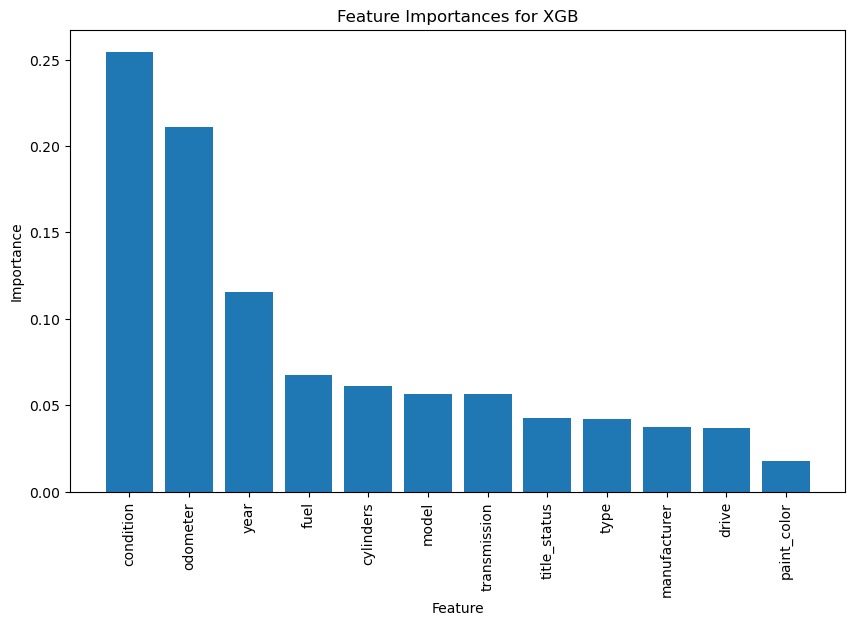

Time taken for XGB: 42.119292974472046 seconds



In [68]:
# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical and numerical features
categorical_features = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']
numeric_features = ['year', 'odometer']

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('target_encoder', ce.TargetEncoder(cols=categorical_features))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to compare with hyperparameters
models = {
    'XGB': {
        'model': XGBRegressor(n_estimators=500, max_depth=10, subsample=0.5),
        'param_grid': {}
    }
}

# Evaluate models using cross-validation and hyperparameter tuning
for model_name, model_data in models.items():
    print(f"Starting {model_name}...")
    start_time = time.time()
    
    # Create pipeline with feature selection and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        #('feature_selection', SequentialFeatureSelector(LinearRegression(), n_features_to_select=10)),
        ('model', model_data['model'])
    ])
    
    pipeline.fit(X_train,y_train)
    
    # Predict on the test set
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse_train = np.sqrt(mean_squared_error(y_pred_train, y_train))
    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test))
    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)
    r2_train = r2_score(y_pred_train, y_train)
    r2_test = r2_score(y_pred_test, y_test)
    
    
    # Print evaluation metrics
    print(f"Evaluation metrics for {model_name}:")
    print(f"Root Mean Squared Error Train, Test: {rmse_train}',' {rmse_test}")
    print(f"Mean Absolute Error Train, Test: {mae_train}',' {mae_test}")
    print(f"R-squared Train, Test: {r2_train}',' {r2_test}")
    
    # Get feature importances
    feature_importances = pipeline.named_steps['model'].feature_importances_
    feature_names = X.columns
    sorted_indices = np.argsort(feature_importances)[::-1]
    
    # Create and display feature importances DataFrame
    importances_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in sorted_indices],
        'Importance': [feature_importances[i] for i in sorted_indices]
    })
    print(importances_df)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
    plt.xticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title(f'Feature Importances for {model_name}')
    plt.show()
    
    end_time = time.time()
    print(f"Time taken for {model_name}: {end_time - start_time} seconds\n")


Training Duration in minutes:  0.65
XGB Regressor Train MAE:  1150.78
XGB Regressor Test MAE:  2333.2
XGB Regressor Train RMSE:  1887.77
XGB Regressor Test RMSE:  5088.74
XGB Regressor Train R2:  98.36
XGB Regressor Test R2:  88.13
         Feature  Importance
0          model    0.230258
1           year    0.197138
2           fuel    0.192761
3      cylinders    0.058772
4   transmission    0.053174
5      condition    0.052078
6       odometer    0.043789
7           type    0.040808
8   manufacturer    0.039133
9   title_status    0.038485
10         drive    0.035439
11   paint_color    0.018165


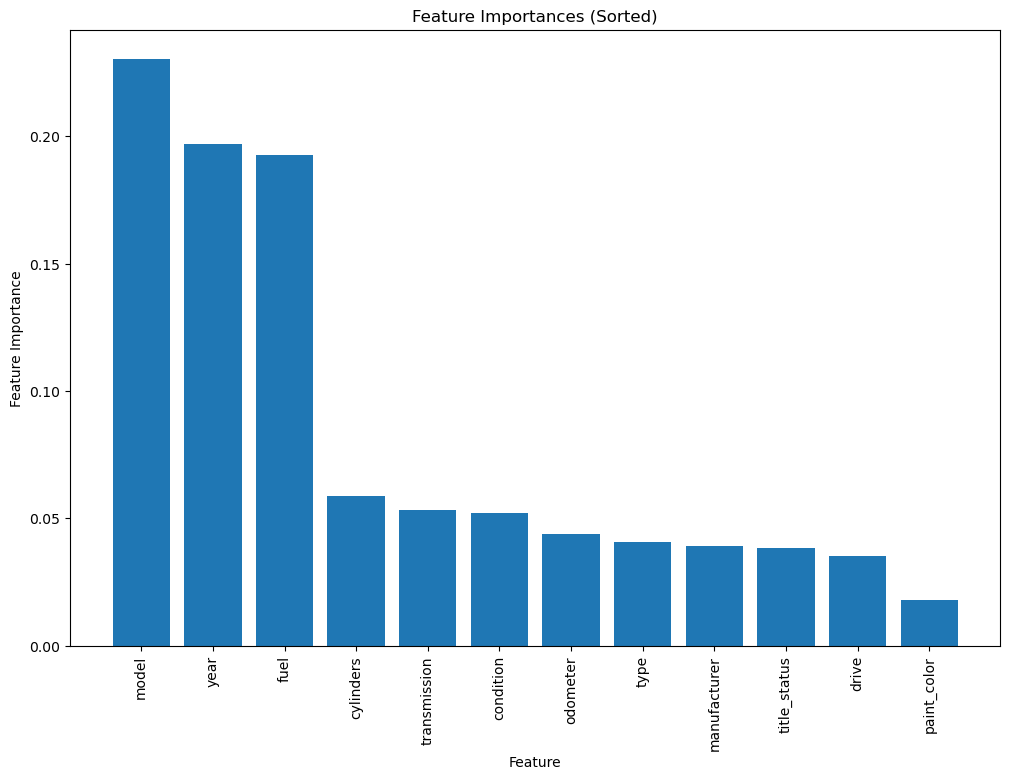

In [69]:
numerical_list = ['year', 'odometer']
categorical_list = ['manufacturer', 'model', 'condition', 'cylinders', 'fuel', 
                        'title_status', 'transmission', 'drive', 'type', 'paint_color']


def preproc(numerical_list, categorical_list):
    target_enc = ce.TargetEncoder(cols=categorical_list)
    scale = RobustScaler()
    
    preprocessing_pipeline = ColumnTransformer([
        ('categorical_pp', target_enc, categorical_list),
        ('numerical_pp', scale, numerical_list)
    ])
    
    return preprocessing_pipeline

# applying the preproc function to the column names
pp_ct = preproc(numerical_list, categorical_list)


#test_data = car_data[:10000]

# Split data into features (X) and target variable (y)
X = car_data.drop('price', axis=1)
y = car_data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fitting the preprocessing transformer to the train and test data
X_train_pp = pp_ct.fit_transform(X_train,y_train)
X_test_pp = pp_ct.transform(X_test)


start = time.time()
xgbr = XGBRegressor(n_estimators=500, max_depth=10, subsample=0.5)
xgbr.fit(X_train_pp, y_train)
training_duration = time.time() - start
print('Training Duration in minutes: ', round(training_duration / 60, 2))
y_pred_xgbr = xgbr.predict(X_test_pp)
y_pred_xgbr_train = xgbr.predict(X_train_pp)

print('XGB Regressor Train MAE: ', round(mean_absolute_error(y_train, y_pred_xgbr_train), 2))
print('XGB Regressor Test MAE: ', round(mean_absolute_error(y_test, y_pred_xgbr), 2))
print('XGB Regressor Train RMSE: ', round(np.sqrt(mean_squared_error(y_train, y_pred_xgbr_train)), 2))
print('XGB Regressor Test RMSE: ', round(np.sqrt(mean_squared_error(y_test, y_pred_xgbr)), 2))
print('XGB Regressor Train R2: ', round(xgbr.score(X_train_pp, y_train), 4)*100)
print('XGB Regressor Test R2: ', round(r2_score(y_test, y_pred_xgbr), 4)*100)

# Get feature importances from the trained XGBoost regressor
feature_importances = xgbr.feature_importances_

# Get feature names after preprocessing for categorical features
categorical_feature_names = pp_ct.transformers_[0][1].get_feature_names_out(categorical_list)

# Combine numerical and categorical feature names
preprocessed_feature_names = categorical_feature_names.tolist() + numerical_list

# Zip feature names and importances, then sort by importance values
sorted_feature_importances = sorted(zip(preprocessed_feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names = [feature_name for feature_name, importance in sorted_feature_importances]
sorted_importances = [importance for feature_name, importance in sorted_feature_importances]

# Create and display feature importances DataFrame
importances_df = pd.DataFrame({
    'Feature': sorted_feature_names,
    'Importance': sorted_importances
})
print(importances_df)

# Plot sorted feature importances
plt.figure(figsize=(12, 8))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances (Sorted)')
plt.xticks(sorted_feature_names, rotation=90)
plt.show()
